# Plotting pupillometric data for exploration

It is crucial to validate preprocessing steps by visually inspecting the results using plots. Therefore, `pypillometry` implements several plotting facilities that encourage active exploration of the dataset. Some of the plotting functions require a Jupyter-notebook with enable widgets (see Installation instructions) so that the plots can be changed interactively, others are purely :mod:`matplotlib`-based.

In [62]:
import sys
sys.path.insert(0,"..")
import pypillometry as pp
import pylab as plt ## access matplotlib functions

d=pp.PupilData.from_file("../data/test.pd")
faked=pp.create_fake_pupildata(ntrials=20)

Each `PupilData` object has a default `plot()` function that, by default, plots the complete signal at once. 

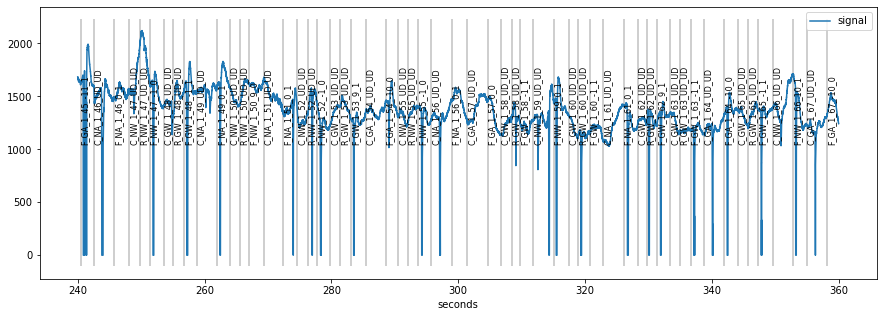

In [2]:
plt.figure(figsize=(15,5))
d.plot()

Often, the signal is too long to fit comfortably into one plot, therefore plot allows to specify a range by specifying the `plot_range=` argument with a `tuple` giving start end end of the plot. For longer recordings, it can be useful to specify the range in different time units by using `units=`. `pypillometry` supports `ms` (milliseconds), `sec` (seconds), `min` (minutes) and `h` (hours).

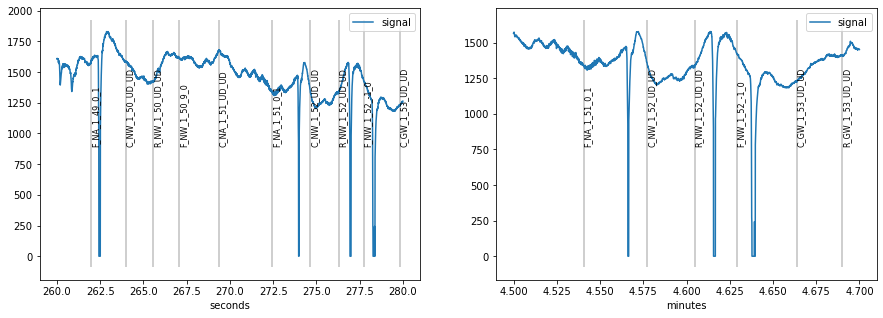

In [3]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
d.plot((260, 280), units="sec")
plt.subplot(1,2,2)
d.plot((4.5, 4.7), units="min")

Note that the scale of the plots went all the way to zero because missing data is represented by `0` in the used eyetracker. 

When we detect and interpolate blinks (see [blinks-notebook](/docs/html/docs/blinks.html)), the scale is adjusted and detected blinks highlighted in red.

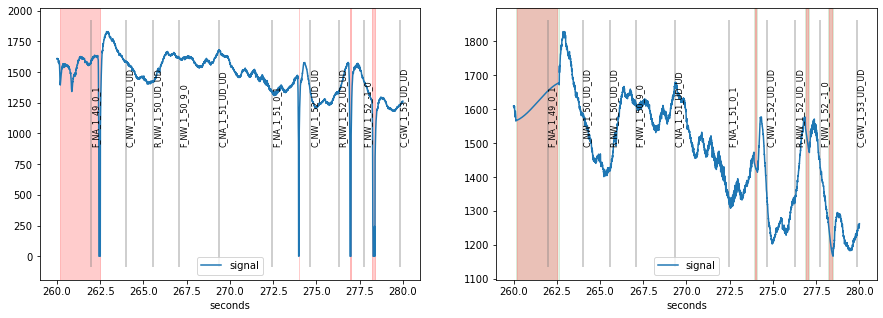

In [4]:
## detect and interpolate blinks
d=d.blinks_detect()
d2=d.blinks_interp_mahot()

## plot results
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
d.plot((260, 280), units="sec")
plt.subplot(1,2,2)
d2.plot((260, 280), units="sec")

In order to enable interactive plotting, you can either use widget-based plotting in the jupyter notebook by using `interactive=True`, or pop-out the plot in `matplotlib`'s plotting window which allows zooming, moving etc. 

In [9]:
## produces plot with adjustable x-axis for exploring signal
d.plot(interactive=True)

interactive(children=(FloatRangeSlider(value=(240.0, 360.0), continuous_update=False, description=' ', layout=…

In [12]:
## pops out the plot in matplotlibs native plotting window
%matplotlib 
d.plot()

Using matplotlib backend: MacOSX


In [21]:
## reset to inline-plotting
%matplotlib inline

In case you are interested in modeling the signal (see notebook [modeling pupillometric signal](/docs/html/docs/modeling.html)), the `plot()` function allows to plot the different components (baseline and response-model) as well as the full model.

Furthermore, it is also possible to plot several datasets simultaneously using the module-level function `plotpd()`. 

By default, the signals are plotted into the same figure in different colors:

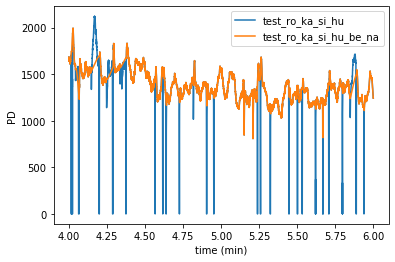

In [71]:
pp.plotpd(d, d2)

By giving the additional argument `subplots=True`, we can also plot them separately as above:

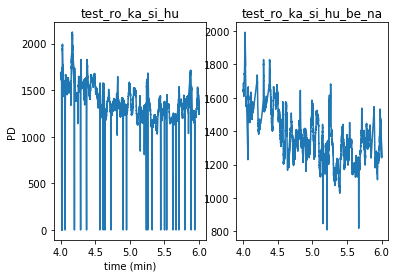

In [72]:
pp.plotpd(d, d2, subplots=True)

There is also an interactive version `plotpd_ia()` that produces a figure where the x-axis can be adjusted dynamically.

In [73]:
pp.plotpd_ia(d, d2)

interactive(children=(FloatRangeSlider(value=(240000.0, 360000.0), continuous_update=False, description=' ', l…

## `plot_segments()`

It is usally a good idea to browse through the whole pupillometric data before and after preprocessing. This can be useful for tweaking preprocessing parameters or for detecting gross artifacts. `pypillometry` offers a function `plot_segments()`, that produces as many plots as necessary (each displaying part of the data). 

The default is to return a list of `matplotillb`-Figure objects that can then manually be plotted/inspected. 

In [42]:
figs=d.plot_segments()

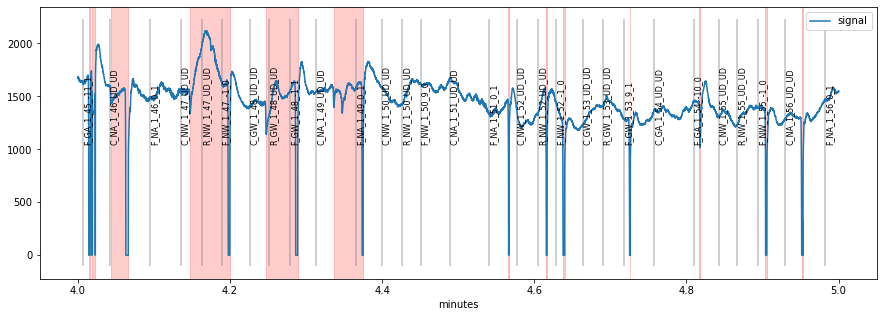

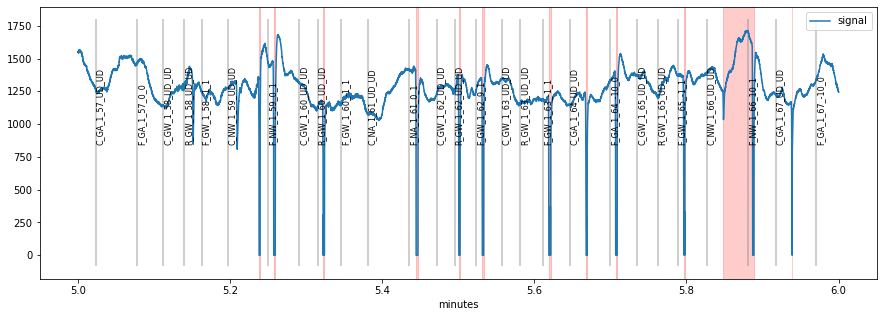

In [43]:
for fig in figs:
    display(fig)

The function also allows to specify a (multi-page) PDF-file to which the plots will be saved for later inspection:

In [46]:
d.plot_segments(pdffile="/tmp/test.pdf");

> Writing PDF file '/tmp/test.pdf'


Another useful feature of this function is to compare the signals before and after preprocessing using the `overlay=` argument:

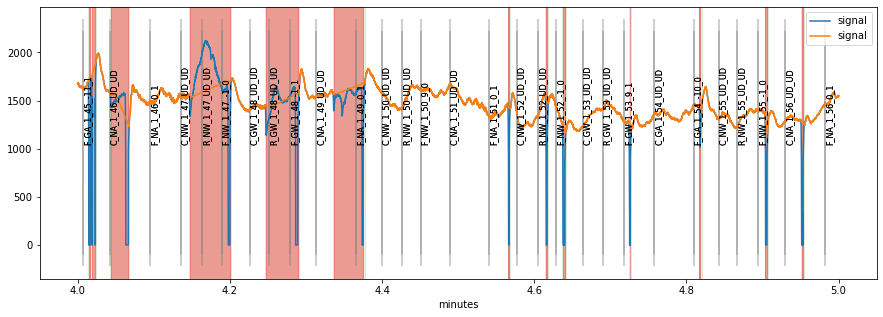

In [47]:
figs=d.plot_segments(overlay=d2)
display(figs[0])

## `blinks_plot()`

Blinks can be tricky to interpolate. To facilite the process, `pypillometry` includes a function to plot all detected blinks. The function works similar to `plot_segments()`, i.e., it returns a list of Figure-objects or allows saving to a PDF file. Each plot contains the index of the currently displayed blink which allows to identify and locate individual blinks in the full dataset.

[<Figure size 720x720 with 28 Axes>]

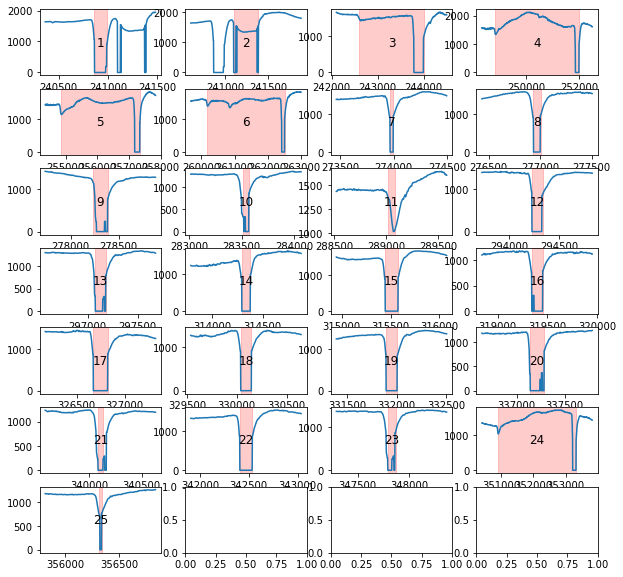

In [59]:
d.blinks_plot(nrow=7, ncol=4)

A special diagnostic plotting option for blinks is available in the `blinks_interp_mahot()` function. When called with the argument `plot=True`, it will produce plots similar to `blinks_plot()` but including information used by the Mahot-algorithm implemented in this function (see API docs for details).

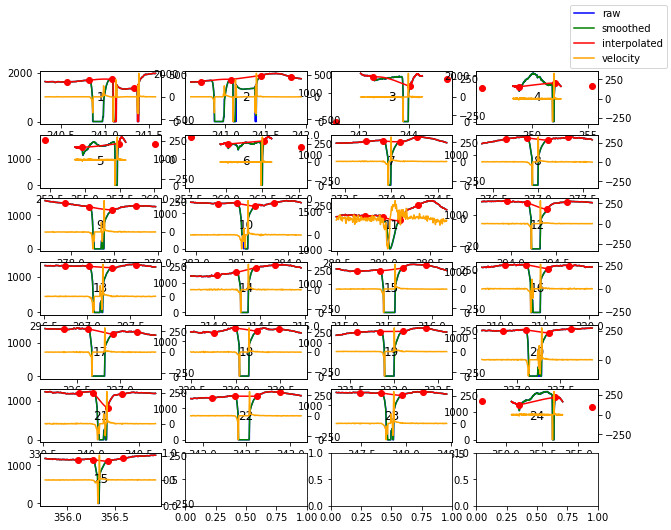

In [58]:
d.blinks_interp_mahot(plot=True, plot_dim=(7,4));